# Enhancing Global Mapping with AI

## Introduction
This notebook is part of a project aimed at enhancing global mapping capabilities through the integration of AI. In collaboration with the Humanitarian OpenStreetMap Team (HOT) and leveraging datasets provided by the initiative, we develop tools to process and visualize geographic data. Our goal is to improve the quality and accessibility of open mapping data through the application of machine learning techniques.

### Project Overview
- **Data Processing**: We manipulate and transform geospatial data to prepare it for analysis.
- **Visualization**: We overlay different geospatial data layers to gain insights and verify the data's integrity.
- **Machine Learning Application**: In subsequent steps (not covered in this notebook), we will apply machine learning models to automate feature detection and enhance mapping quality.

*Note: This notebook focuses on data processing and visualization steps.*


## Data Loading

This section is dedicated to loading the geographic data necessary for our mapping project. The data includes satellite images (raster data), binary masks (also raster data) indicating features of interest, and GeoJSON files containing vector data with additional annotations.

The function `load_images_masks_geojson` is designed to iterate over a directory of satellite images, load corresponding binary masks and GeoJSON files, normalize the raster data, and return arrays of images, masks, and a list of GeoJSON objects.

By processing and storing these data structures, we set the stage for subsequent analysis and visualization.


In [13]:
# Required libraries for handling geospatial data and file operations
import rasterio # for reading raster data
import numpy as np  
import os  
import geopandas as gpd # for reading and handling vector data
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import random
import pandas as pd 


def load_tif_with_rasterio(file_path):
    """
    Load a TIFF file using Rasterio and return it as a NumPy array.

    Parameters:
    file_path (str): Path to the TIFF file

    Returns:
    numpy.ndarray: Image data as a NumPy array
    """
    with rasterio.open(file_path) as src:
        # Read the image data and return it as a NumPy array
        img = src.read()
        # Reorder the dimensions if necessary (depends on your data format)
        if img.shape[0] < img.shape[2]:
            img = np.moveaxis(img, 0, -1)
        return img

# Function to load satellite images, binary masks, and GeoJSON data from directories
def load_images_masks_geojson(chips_dir, masks_dir, labels_dir):
    images = [] #List to store image data
    masks = []  #List to store mask data
    geojsons = [] # List to store GeoJSON data

    # Iterate over all files in the directory containing the satellite images
    for filename in os.listdir(chips_dir):
        if filename.endswith('.tif'): # Check for TIFF files which are satellite images
            base_filename = filename.split('.')[0] # Extract the base filename without extension

            # Construct the full path to the corresponding mask and GeoJSON files
            img_path = os.path.join(chips_dir, filename)
            mask_path = os.path.join(masks_dir, base_filename + '.mask.tif')
            geojson_path = os.path.join(labels_dir, base_filename + '.geojson')
            
            # Check if the corresponding mask and GeoJSON files exist
            if os.path.exists(mask_path) and os.path.exists(geojson_path):
                # Load image and mask
                img = load_tif_with_rasterio(img_path)
                mask = load_tif_with_rasterio(mask_path)
                # Load GeoJSON as a GeoDataFrame
                geojson = gpd.read_file(geojson_path)

                # Normalize the image and mask data to the range [0, 1]
                images.append(img / 255.0)
                masks.append(mask / 255.0)

                # Append the loaded GeoJSON to the list
                geojsons.append(geojson)

# Convert the lists of images and masks to NumPy arrays for further processing
    return np.array(images), np.array(masks), geojsons






# Directories containing the satellite images, binary masks, and GeoJSON annotations
chips_dir = 'drive-download-20240401T150616Z-001/training_364/preprocessed/chips'
masks_dir = 'drive-download-20240401T150616Z-001/training_364/preprocessed/binarymasks'
labels_dir = 'drive-download-20240401T150616Z-001/training_364/preprocessed/labels'


# Load the images, masks, and GeoJSON data from the defined directories
images, masks, geojson = load_images_masks_geojson(chips_dir, masks_dir, labels_dir)


## Visualization of Raster and Mask Data

In this section, we load and visualize a sample of raster (satellite) image and its corresponding binary mask. The objective is to ensure that the raster data and mask are being read correctly and to understand how they align visually.

### Raster Image Visualization
We start by loading a specific raster image using `rasterio`, a library specialized in handling geospatial raster data. The image is then displayed using `matplotlib`.

### Binary Mask Visualization
Subsequently, we load and visualize the corresponding binary mask for the selected raster image. Binary masks are typically single-band images that indicate the presence or absence of certain features (like buildings, roads, etc.) in the raster image.


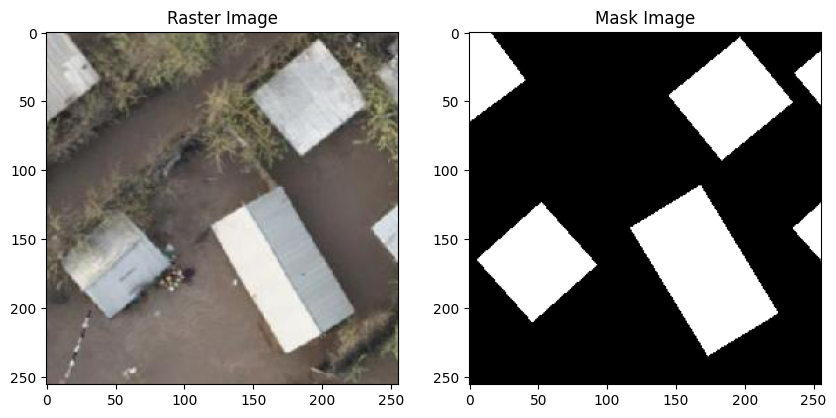

In [8]:


# Load the raster
raster_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/chips/OAM-1251438-1026599-21.tif'
with rasterio.open(raster_path) as src:
    raster_img = src.read() # Read the raster data
    raster_img = np.moveaxis(raster_img, 0, -1) # Reorder dimensions for visualization
    raster_transform = src.transform # Transformation matrix for spatial referencing



# Load and display the binary mask corresponding to the raster image
mask_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/binarymasks/OAM-1251438-1026599-21.mask.tif'
with rasterio.open(mask_path) as src:
    mask_img = src.read(1)  # Read the first (and only) band of the mask

# Display the raster image and the mask side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Display the raster image
axs[0].imshow(raster_img)
axs[0].set_title('Raster Image')
# Display the mask with grayscale color mapping
axs[1].imshow(mask_img, cmap='gray')
axs[1].set_title('Mask Image')

plt.show()


## Visualizing GeoJSON Data

In the following section, we focus on loading and visualizing GeoJSON data. GeoJSON is a widely-used format for encoding a variety of geographic data structures. Here, we use it to represent vector data like points, lines, and polygons, which are typically used to annotate specific features or areas of interest on the map.

### GeoJSON Data Overview
We load a single GeoJSON file using `geopandas`, a powerful tool that simplifies working with geospatial data in Python. The visualization allows us to inspect the shapes and boundaries defined in the GeoJSON, ensuring that our vector data is correctly formatted and informative.

The plot generated below will display the outlines or shapes as defined in the GeoJSON file, giving us a visual understanding of the geographic features it represents.


GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osm_id    6 non-null      int64   
 1   tags      6 non-null      object  
 2   geometry  6 non-null      geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 276.0+ bytes
None

First Few Entries:
       osm_id                                               tags  \
0   698612286  {'building': 'yes', 'roof:material': 'metal_sh...   
1   698612285  {'building': 'yes', 'roof:material': 'metal_sh...   
2  1201618428  {'building': 'yes', 'roof:material': 'metal_sh...   
3   698612287  {'building': 'yes', 'roof:material': 'metal_sh...   
4   698612288  {'building': 'yes', 'roof:material': 'metal_sh...   

                                            geometry  
0  POLYGON ((3876554.648 419955.817, 3876558.867 ...  
1  POLYGON ((3876546.021 419954.891, 3876549.049 ...  
2  POL

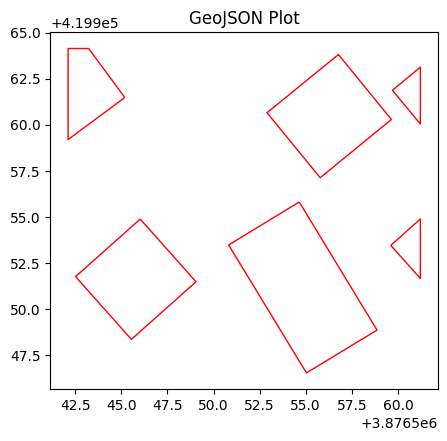

In [9]:
import geopandas as gpd

# Load the GeoJSON file using geopandas
geojson_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/labels/OAM-1251438-1026599-21.geojson'
gdf = gpd.read_file(geojson_path)

# Print detailed information about the GeoDataFrame
print("GeoDataFrame Info:")
print(gdf.info())

# Print the first few entries in the GeoDataFrame
print("\nFirst Few Entries:")
print(gdf.head())

# Print geometry types
print("\nGeometry Types:")
print(gdf.geometry.type.unique())

# Print descriptive statistics if there are numerical columns
if gdf.select_dtypes(include=['number']).columns.any():
    print("\nDescriptive Statistics:")
    print(gdf.describe())

# Print missing values count
print("\nMissing Values Count:")
print(gdf.isnull().sum())

# Print CRS information
print("\nCoordinate Reference System (CRS) Info:")
print(gdf.crs)

# Visualizing the GeoJSON data using matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, facecolor='none', edgecolor='red')  # Plot with red edges and no fill
ax.set_title('GeoJSON Plot')
plt.show()


## Comparing Spatial Extents of Raster and GeoJSON

The purpose of this section is to compare the spatial extents of the raster image and the GeoJSON data. This comparison is crucial to ensure that the vector data (GeoJSON) aligns correctly with the raster data, allowing for accurate overlay and analysis.

### Understanding Spatial Extents
- **Raster Bounds**: Refers to the geographical boundaries (coordinates) of the raster image.
- **GeoJSON Bounds**: Represents the geographical boundaries of the features encoded in the GeoJSON file.

By printing the bounds of both the raster image and the GeoJSON, we can visually verify if they cover similar geographical areas, which is a prerequisite for successful overlay and analysis in further steps.

### Checking Raster and GeoJSON Bounds: Why It Matters

**Spatial Alignment:** Ensuring raster and GeoJSON data overlap is crucial for combined spatial analyses. This confirms they cover the same geographical area.

**Coordinate System Consistency:** Checking bounds helps verify that both datasets are in the same coordinate reference system, avoiding misalignment and inaccuracies.

**Data Quality Check:** Comparing bounds indicates data completeness and relevance, ensuring that both datasets are suitable for the intended analysis.

**Efficient Data Processing:** Knowing the bounds enables optimized data processing, allowing for clipping or focusing on areas of interest.

**Improved Visualization:** Proper bounds understanding is key for effective data visualization and accurate interpretation of geospatial patterns.

In short, assessing the bounds of raster and GeoJSON data is fundamental for ensuring their compatibility, optimizing processing, and enhancing the accuracy of spatial analyses and visualizations.


In [4]:

# Load the raster image to obtain its bounds
raster_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/chips/OAM-1251438-1026599-21.tif'
with rasterio.open(raster_path) as src:
    raster_bounds = src.bounds
    # Explain what bounds are
    print("Raster Bounds:")
    print("The raster image has a rectangular boundary defined by these coordinates:")
    print("Left (min Longitude):", raster_bounds.left)
    print("Bottom (min Latitude):", raster_bounds.bottom)
    print("Right (max Longitude):", raster_bounds.right)
    print("Top (max Latitude):", raster_bounds.top)
    print("This defines the spatial extent of the raster image.\n")

# Load the GeoJSON file to obtain its bounds
geojson_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/labels/OAM-1251438-1026599-21.geojson'
gdf = gpd.read_file(geojson_path)  # Read the GeoJSON file as a GeoDataFrame
geojson_bounds = gdf.total_bounds
# Explain what bounds are
print("GeoJSON Bounds:")
print("The GeoJSON data has a bounding box defined by these coordinates:")
print("Left (min Longitude):", geojson_bounds[0])
print("Bottom (min Latitude):", geojson_bounds[1])
print("Right (max Longitude):", geojson_bounds[2])
print("Top (max Latitude):", geojson_bounds[3])
print("This bounding box encloses all the geometries in the GeoJSON file.")


Raster Bounds:
The raster image has a rectangular boundary defined by these coordinates:
Left (min Longitude): 3876542.1079968563
Bottom (min Latitude): 419945.0333987583
Right (max Longitude): 3876561.2172539276
Top (max Latitude): 419964.14265582955
This defines the spatial extent of the raster image.

GeoJSON Bounds:
The GeoJSON data has a bounding box defined by these coordinates:
Left (min Longitude): 3876542.1079968563
Bottom (min Latitude): 419946.54635483056
Right (max Longitude): 3876561.2172539276
Top (max Latitude): 419964.14265582955
This bounding box encloses all the geometries in the GeoJSON file.


## Integrated Visualization of Raster Image, Binary Mask, and GeoJSON Data

This section of the notebook demonstrates the combined visualization of a raster image, its corresponding binary mask, and GeoJSON data. This integration is pivotal for assessing the alignment and accuracy of our different data sources.

### Step-by-Step Overlay Process:
1. **Raster Image Visualization**: We begin by loading and displaying a raster image, which represents satellite imagery or similar data.
2. **Binary Mask Overlay**: Next, we overlay a binary mask onto the raster image. This mask highlights specific features or areas of interest.
3. **GeoJSON Data Overlay**: Finally, we add the GeoJSON vector data on top. This layer provides additional context or annotations relevant to the features in the raster image.

The combination of these layers in a single visualization allows us to see how well the different types of data align and correlate, which is essential for accurate geospatial analysis.


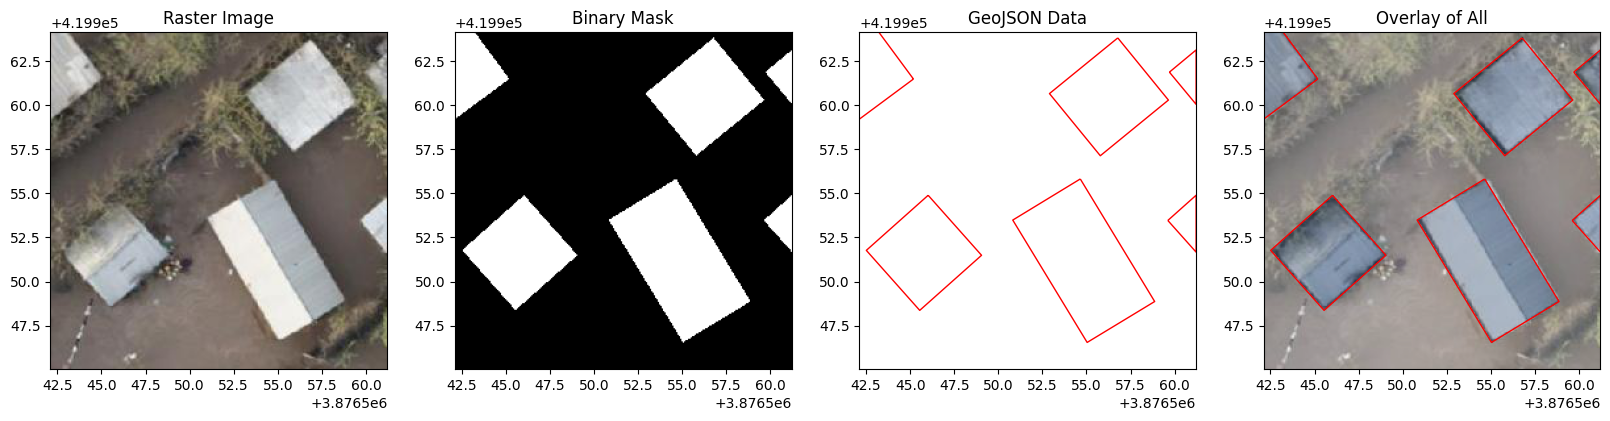

In [10]:


# Load and process the raster image, binary mask, and GeoJSON data for visualization
raster_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/chips/OAM-1251438-1026599-21.tif'
mask_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/binarymasks/OAM-1251438-1026599-21.mask.tif'
geojson_path = 'drive-download-20240401T150616Z-001/training_364/preprocessed/labels/OAM-1251438-1026599-21.geojson'

# Read and prepare the raster image
with rasterio.open(raster_path) as src:
    raster_img = src.read()                       # Read raster data
    if raster_img.shape[0] < raster_img.shape[2]:
        raster_img = np.moveaxis(raster_img, 0, -1) # Reorder dimensions if needed
    raster_transform = src.transform # Spatial transform for raster data
    raster_crs = src.crs      # Coordinate reference system of the raster
    raster_extent = src.bounds # Spatial extent of the raster

# Ensure the GeoJSON file is in the same coordinate reference system as the raster
gdf = gpd.read_file(geojson_path)
if gdf.crs != raster_crs:
    gdf = gdf.to_crs(raster_crs)  # Reproject GeoJSON to match raster CRS

# Read the binary mask
with rasterio.open(mask_path) as src:
    mask = src.read(1)

# Ensure the bounds are aligned; set the axes limits to match the raster's extent
raster_extent = (raster_extent.left, raster_extent.right, raster_extent.bottom, raster_extent.top)

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Display raster image
axs[0].imshow(raster_img, extent=raster_extent)
axs[0].set_title('Raster Image')

# Display binary mask
axs[1].imshow(mask, cmap='gray', extent=raster_extent)
axs[1].set_title('Binary Mask')

# Display GeoJSON data
gdf.plot(ax=axs[2], facecolor='none', edgecolor='red')
axs[2].set_xlim(raster_extent[0], raster_extent[1])
axs[2].set_ylim(raster_extent[2], raster_extent[3])
axs[2].set_title('GeoJSON Data')

# Display overlay of all three
axs[3].imshow(raster_img, extent=raster_extent)
axs[3].imshow(mask, cmap='Blues', alpha=0.3, extent=raster_extent)
gdf.plot(ax=axs[3], facecolor='none', edgecolor='red')
axs[3].set_title('Overlay of All')

plt.show()


## Bulk Processing and Visualization of Data

In this final section, we extend the visualization approach to multiple images, masks, and GeoJSON files. The goal is to automate the process of visualizing a subset of our data, allowing for a more comprehensive analysis across various samples.

### Automated Visualization Process:
- **Function Definition**: A function, `process_and_plot_image`, is defined to handle the loading, processing, and integrated visualization of a single set of raster, mask, and GeoJSON data.
- **Random Sampling**: We then apply this function to a randomly selected subset of our dataset. This approach offers a broad view across different regions or features represented in the data.
- **Iterative Visualization**: The function is called iteratively for each selected file, ensuring a consistent and automated visualization across multiple data samples.

This automated and iterative approach is particularly useful for large datasets, allowing for efficient and informative exploration of spatial data.


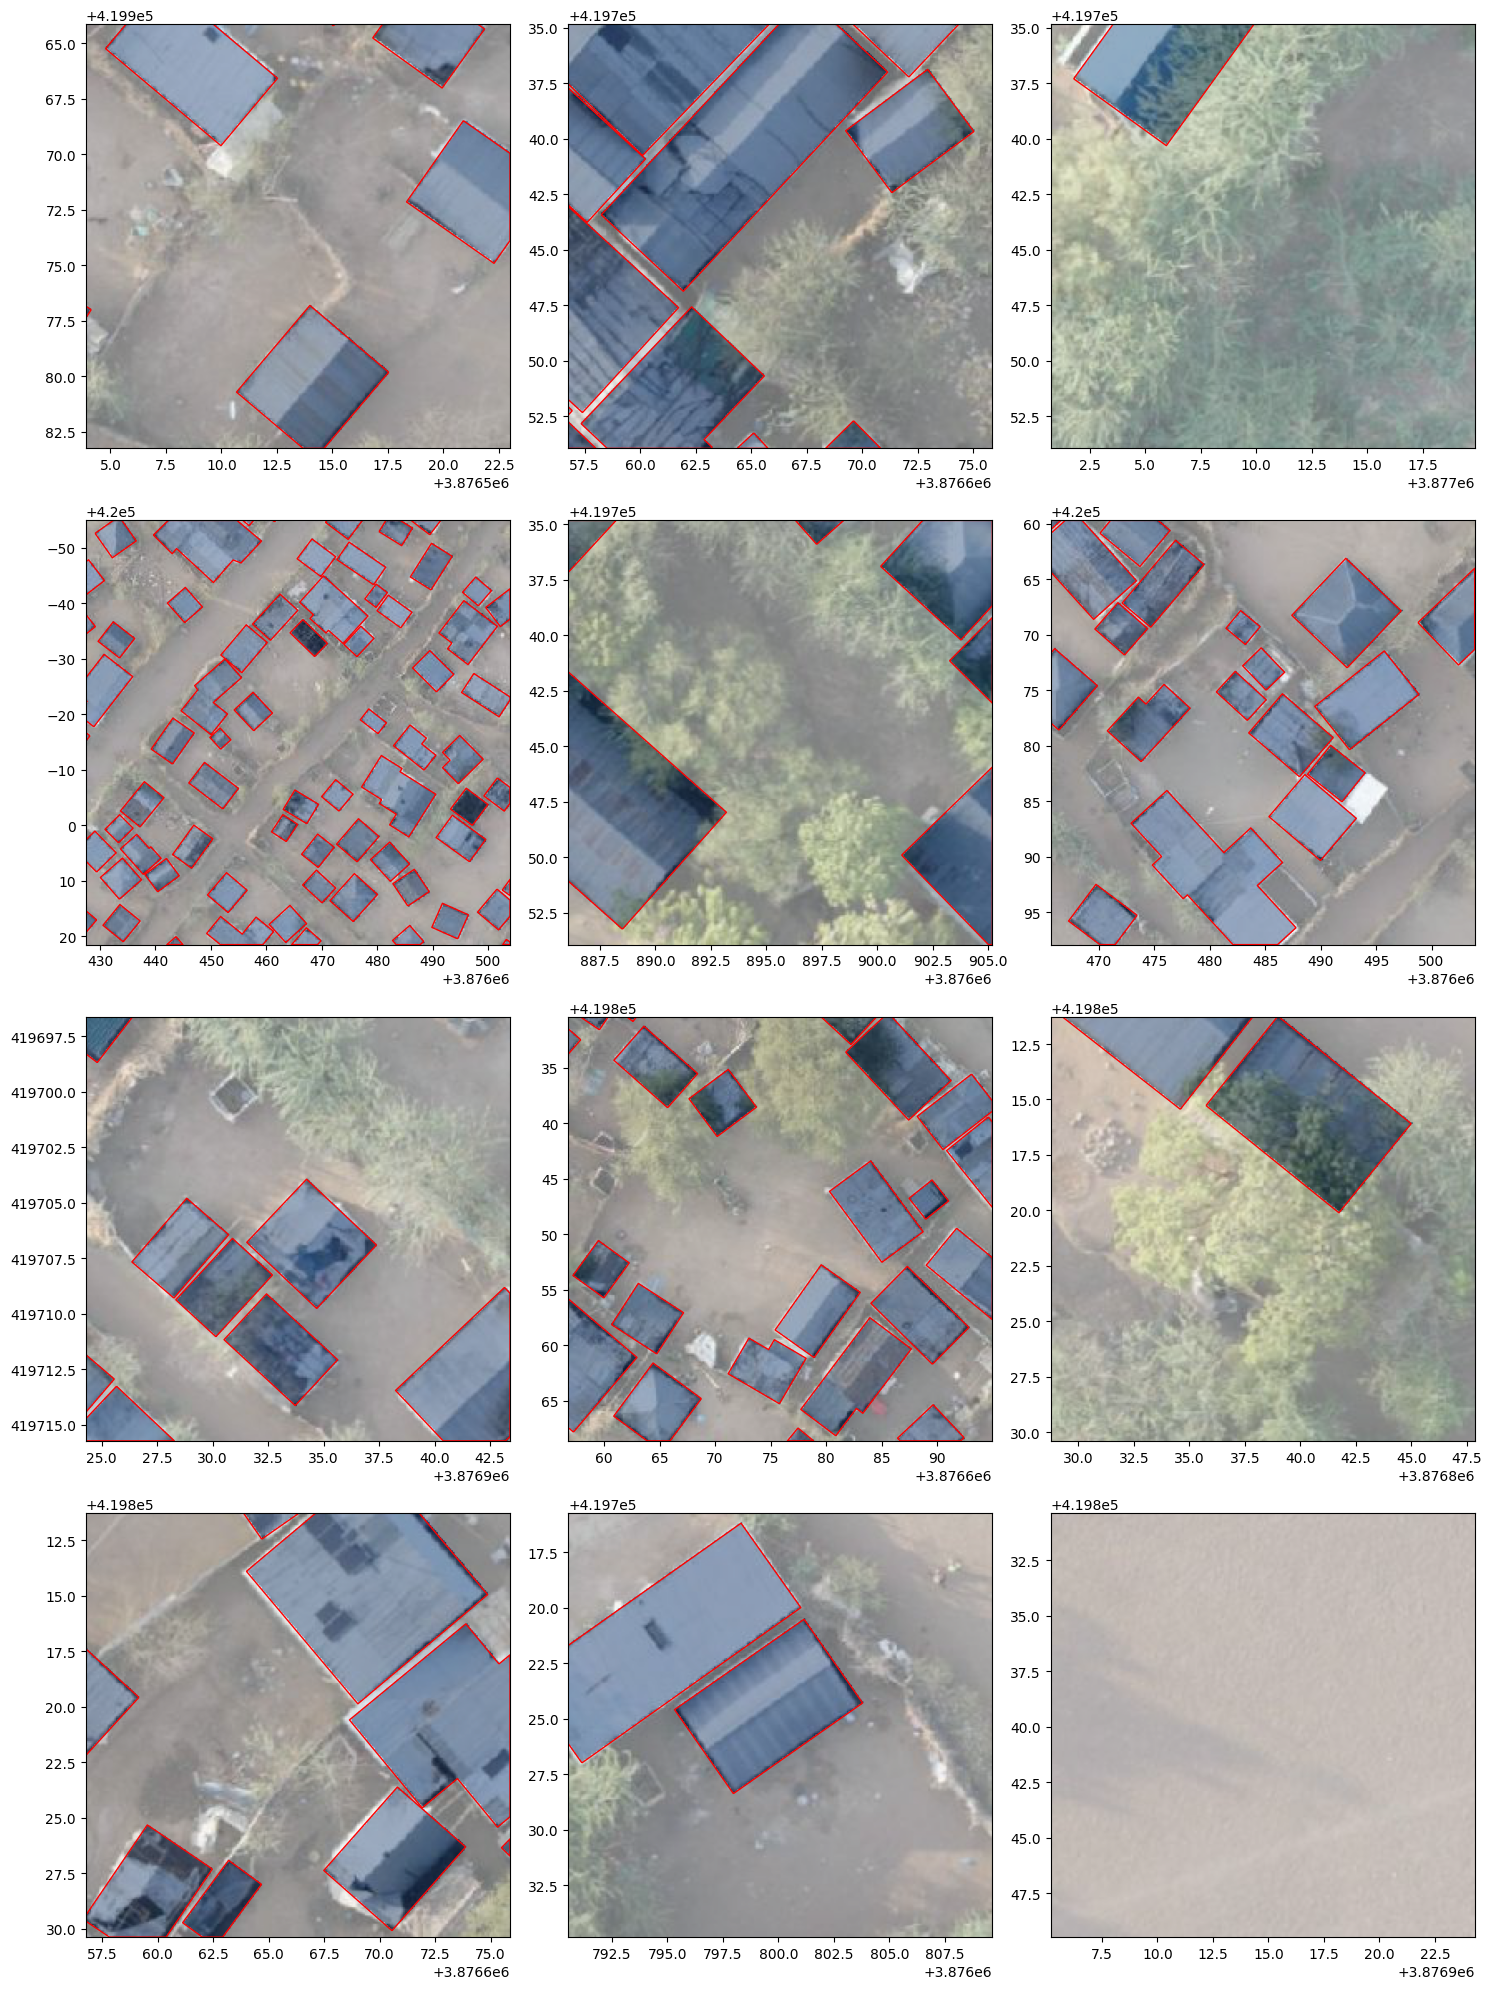

In [11]:

# Function to process and plot a single set of raster, mask, and GeoJSON in a given axis
def process_and_plot_image(raster_path, mask_path, geojson_path, ax):
    # Read the raster image
    with rasterio.open(raster_path) as src:
        raster_img = src.read()
        transform = src.transform
        if raster_img.shape[0] < raster_img.shape[2]:  # If number of bands is first
            raster_img = np.moveaxis(raster_img, 0, -1)  # Move bands to the last axis
        bounds = src.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        crs = src.crs

    # Read the binary mask
    with rasterio.open(mask_path) as src:
        mask = src.read(1)  # Single-band

    # Load and reproject the GeoJSON if needed
    gdf = gpd.read_file(geojson_path)
    if gdf.crs != crs:
        gdf = gdf.to_crs(crs)

    # Integrated visualization of raster, mask, and GeoJSON in the given axis
    ax.imshow(raster_img, extent=extent)
    ax.imshow(mask, cmap='Blues', alpha=0.4, extent=extent)
    
    # Plot GeoJSON if not empty
    if not gdf.empty:
        gdf.boundary.plot(ax=ax, color='red', linewidth=1)

    # Set the axes limits
    ax.set_xlim([bounds.left, bounds.right])
    ax.set_ylim([bounds.top, bounds.bottom])  # Correct order for top, bottom

# Number of images per row
images_per_row = 3

# Select a random sample of files for visualization
all_files = [f for f in os.listdir(chips_dir) if f.endswith('.tif')]
selected_files = random.sample(all_files, 12)  # Change 10 to the desired number of samples

# Number of rows needed for the subplots
rows = len(selected_files) // images_per_row + (len(selected_files) % images_per_row > 0)

# Create the subplots
fig, axs = plt.subplots(rows, images_per_row, figsize=(15, 5 * rows))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Apply the visualization function to each selected file
for idx, filename in enumerate(selected_files):
    base_filename = os.path.splitext(filename)[0]
    raster_path = os.path.join(chips_dir, filename)
    mask_path = os.path.join(masks_dir, base_filename + '.mask.tif')
    geojson_path = os.path.join(labels_dir, base_filename + '.geojson')

    process_and_plot_image(raster_path, mask_path, geojson_path, axs[idx])

# Adjust the layout
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) of Geospatial Data

With our data visualized, the next step is to dive deeper into understanding it. This Exploratory Data Analysis (EDA) section will focus on analyzing our geospatial data from various perspectives. We'll look at statistical summaries, explore the distribution of features, and understand the geographic characteristics present in our dataset.

### Advanced Raster Data Analysis
We begin by examining the distribution of pixel values across our raster images. This will give us an idea of the image contrast and brightness, which are important factors for image processing and analysis. A histogram of pixel values will visually represent this distribution.

### Detailed GeoJSON Data Analysis
Next, we focus on the GeoJSON data. Here, we not only identify the types of geometrical features present but also analyze specific attributes, such as the area of these features if they are polygons. Understanding the size distribution of geographical features can be crucial for certain types of geospatial analysis. We will calculate basic statistics like mean, maximum, and minimum area and visualize this distribution with a histogram.

This deeper level of analysis will provide us with valuable insights that are critical for the subsequent stages of data preprocessing and model training.


Exploratory Data Analysis of Raster and GeoJSON Data

Raster Data Analysis
Mean Pixel Value: 0.4886572699840734
Max Pixel Value: 1.0
Min Pixel Value: 0.0


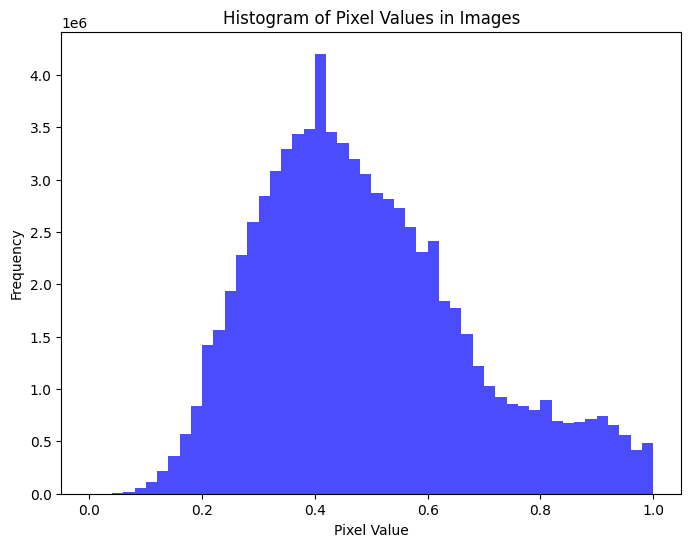


GeoJSON Data Analysis
Total number of features across all GeoJSON files: 3129
Types of geometries across all GeoJSON files: ['Polygon' 'MultiPolygon']


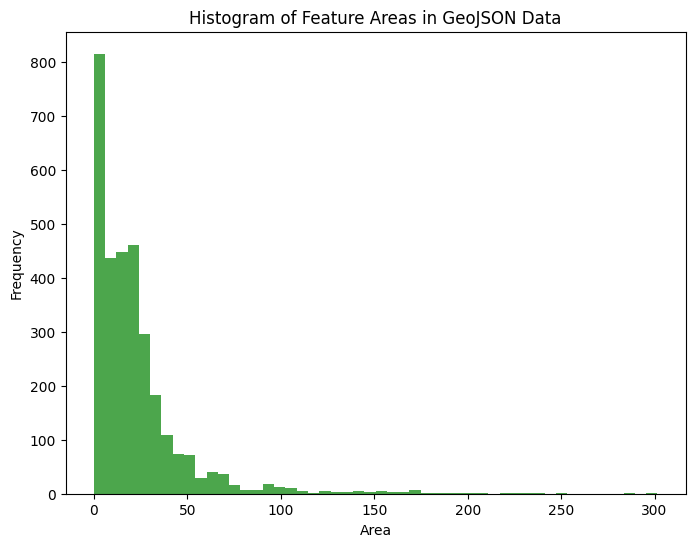

Mean Area of Features: 22.615122118078283
Max Area of Features: 301.57026687505413
Min Area of Features: 6.452227568133349e-06


In [14]:


# Assuming 'images', 'masks', and 'geojson' are already loaded from previous cells
print("Exploratory Data Analysis of Raster and GeoJSON Data")

# Raster Data Analysis
print("\nRaster Data Analysis")
print("Mean Pixel Value:", np.mean(images))
print("Max Pixel Value:", np.max(images))
print("Min Pixel Value:", np.min(images))

# Histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(images.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values in Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# GeoJSON Data Analysis
print("\nGeoJSON Data Analysis")
all_geojsons = pd.concat(geojson)  # Concatenate all GeoDataFrames into one DataFrame
print("Total number of features across all GeoJSON files:", len(all_geojsons))
feature_types = all_geojsons.geometry.geom_type.unique()
print("Types of geometries across all GeoJSON files:", feature_types)

# Example: Analyzing specific attributes like area of features (for polygons)
if 'Polygon' in feature_types or 'MultiPolygon' in feature_types:
    all_geojsons['area'] = all_geojsons.geometry.area
    plt.figure(figsize=(8, 6))
    plt.hist(all_geojsons['area'], bins=50, color='green', alpha=0.7)
    plt.title("Histogram of Feature Areas in GeoJSON Data")
    plt.xlabel("Area")
    plt.ylabel("Frequency")
    plt.show()

    # Displaying basic statistics for the area
    print("Mean Area of Features:", all_geojsons['area'].mean())
    print("Max Area of Features:", all_geojsons['area'].max())
    print("Min Area of Features:", all_geojsons['area'].min())


## Conclusion and Next Steps

We've reached the end of this journey through exploring and manipulating geospatial data. Throughout this notebook, we have delved into the intricacies of raster images, binary masks, and GeoJSON data. Our journey took us through loading and visualizing this data, understanding its statistical properties, and preparing it for more advanced applications.

### Key Takeaways:
- We've gained familiarity with geospatial data formats and the nuances of handling such data in Python.
- Through visualizations, we obtained a clearer picture of how different data layers interact and complement each other.
- The exploratory data analysis provided us with valuable insights, revealing underlying patterns and distributions in our data.
- We prepared our data for the next stage of our project, ensuring it is clean, normalized, and ready for machine learning applications.

### Looking Ahead:
As we close this notebook, we are well-equipped with the knowledge and groundwork necessary for the next phase: **training a YOLO model for object detection in geospatial imagery**. The foundations laid here will be instrumental in navigating the challenges of machine learning in the context of geospatial data.

Thank you for embarking on this exploratory journey. Let's gear up for the exciting machine learning challenges that await us in our next notebook!
